# Naive Bayes Classifier

## 1. Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
%matplotlib inline

## 2. For Iris Dataset

In [ ]:
# Reading the dataset into a pandas dataframe
iris_data = pd.read_csv("Iris.csv", index_col=0)
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


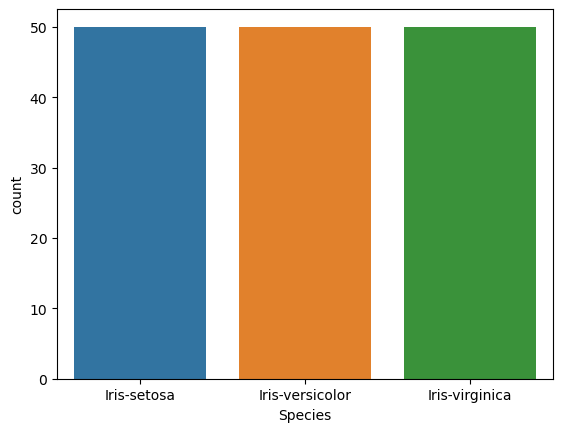

In [ ]:
# Plotting to view the number of tuples of each class
sns.countplot(x="Species", data=iris_data);

### As the parameters are numerical, GaussianNB is used

#### For data split as 90 : 10

In [ ]:
np.random.seed(42)
X = iris_data.drop("Species", axis=1)
y = iris_data["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=125)
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9333333333333333

#### For the data split as 70 : 30

In [ ]:
np.random.seed(42)
X = iris_data.drop("Species", axis=1)
y = iris_data["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=125)
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9777777777777777

#### For Leave one out

Probability of not predicting accurately:  4.666666666666667
Probability of predicting accurately:  95.33333333333334


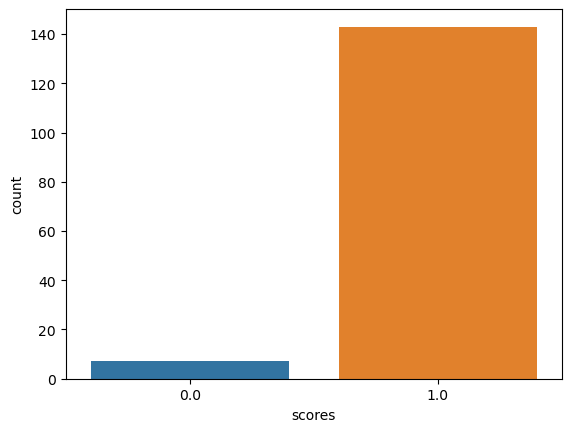

In [ ]:
scores = []
np.random.seed(42)
loo = LeaveOneOut()
for i, (train_idx, test_idx) in enumerate(loo.split(X, y=y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
scores = pd.DataFrame(scores)
scores.rename(columns={"0": "scores"}, inplace=True)
scores.columns = ["scores"]
score_0 = len(scores[scores["scores"] == 0.0])
score_1 = len(scores[scores["scores"] == 1.0])
print("Probability of not predicting accurately: ", (score_0/(score_1 + score_0))*100)
print("Probability of predicting accurately: ", (score_1/(score_1 + score_0))*100)
sns.countplot(x="scores", data=scores);

## 3. For Titanic Dataset

In [ ]:
# Reading the file into a pandas dataframe
titanic_data = pd.read_csv("Titanic-Dataset.csv", index_col=0)
temp = pd.read_csv("titanic.csv", index_col=0)
titanic_data = pd.concat([titanic_data, temp])
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [ ]:
titanic_data.drop("Name", axis=1, inplace=True)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,0,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [ ]:
titanic_data.drop("Ticket", axis=1, inplace=True)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
1305,0,3,male,NaN,0,0,8.0500,NaN,S
1306,1,1,female,39.0,0,0,108.9000,C105,C
1307,0,3,male,38.5,0,0,7.2500,NaN,S


In [ ]:
titanic_data.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [ ]:
titanic_data["Age"].fillna(value=titanic_data["Age"].mean(), inplace=True)
titanic_data.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [ ]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
titanic_data["Cabin"].loc[~titanic_data["Cabin"].isnull()] = "Yes"
titanic_data["Cabin"].loc[titanic_data["Cabin"].isnull()] = "No"
titanic_data.isnull().sum()

C:\Users\SRIRAMA BHAT\AppData\Local\Temp\ipykernel_5388\3583404093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data["Cabin"].loc[~titanic_data["Cabin"].isnull()] = "Yes"
C:\Users\SRIRAMA BHAT\AppData\Local\Temp\ipykernel_5388\3583404093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data["Cabin"].loc[titanic_data["Cabin"].isnull()] = "No"


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Cabin       0
Embarked    2
dtype: int64

In [ ]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,No,S
2,1,1,female,38.000000,1,0,71.2833,Yes,C
3,1,3,female,26.000000,0,0,7.9250,No,S
4,1,1,female,35.000000,1,0,53.1000,Yes,S
5,0,3,male,35.000000,0,0,8.0500,No,S
...,...,...,...,...,...,...,...,...,...
1305,0,3,male,29.881138,0,0,8.0500,No,S
1306,1,1,female,39.000000,0,0,108.9000,Yes,C
1307,0,3,male,38.500000,0,0,7.2500,No,S


In [ ]:
titanic_data.dropna(axis=0, inplace=True)
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,No,S
2,1,1,female,38.000000,1,0,71.2833,Yes,C
3,1,3,female,26.000000,0,0,7.9250,No,S
4,1,1,female,35.000000,1,0,53.1000,Yes,S
5,0,3,male,35.000000,0,0,8.0500,No,S
...,...,...,...,...,...,...,...,...,...
1305,0,3,male,29.881138,0,0,8.0500,No,S
1306,1,1,female,39.000000,0,0,108.9000,Yes,C
1307,0,3,male,38.500000,0,0,7.2500,No,S


### Use CategoricalNB for categorical values and GaussianNB for Gaussian values

In [ ]:
new_titanic_data_2 = titanic_data
new_titanic_data_2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,No,S
2,1,1,female,38.000000,1,0,71.2833,Yes,C
3,1,3,female,26.000000,0,0,7.9250,No,S
4,1,1,female,35.000000,1,0,53.1000,Yes,S
5,0,3,male,35.000000,0,0,8.0500,No,S
...,...,...,...,...,...,...,...,...,...
1305,0,3,male,29.881138,0,0,8.0500,No,S
1306,1,1,female,39.000000,0,0,108.9000,Yes,C
1307,0,3,male,38.500000,0,0,7.2500,No,S


In [ ]:
new_titanic_data_2 = pd.get_dummies(new_titanic_data_2, columns=["Pclass", "Sex", "Cabin", "Embarked"])
new_titanic_data_2

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,22.000000,1,0,7.2500,0,0,1,0,1,1,0,0,0,1
2,1,38.000000,1,0,71.2833,1,0,0,1,0,0,1,1,0,0
3,1,26.000000,0,0,7.9250,0,0,1,1,0,1,0,0,0,1
4,1,35.000000,1,0,53.1000,1,0,0,1,0,0,1,0,0,1
5,0,35.000000,0,0,8.0500,0,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,29.881138,0,0,8.0500,0,0,1,0,1,1,0,0,0,1
1306,1,39.000000,0,0,108.9000,1,0,0,1,0,0,1,1,0,0
1307,0,38.500000,0,0,7.2500,0,0,1,0,1,1,0,0,0,1


#### For 70 : 30 split

In [ ]:
cat_X = new_titanic_data_2.drop("Age", axis=1)
cat_X.drop("SibSp", axis=1, inplace=True)
cat_X.drop("Parch", axis=1, inplace=True)
cat_X.drop("Fare", axis=1, inplace=True)
cat_X.drop("Survived", axis=1, inplace=True)
gaus_X = pd.concat([new_titanic_data_2["Age"], new_titanic_data_2["Parch"], new_titanic_data_2["Fare"], new_titanic_data_2["SibSp"]], axis=1, ignore_index=True)
y = new_titanic_data_2["Survived"]
cat_X_train, cat_X_test, gaus_X_train, gaus_X_test, y_train, y_test = train_test_split(cat_X, gaus_X, y, test_size=0.3, random_state=75)
clf1 = CategoricalNB()
clf1.fit(cat_X_train, y_train)
clf2 = GaussianNB()
clf2.fit(gaus_X_train, y_train)
cat_score = clf1.score(cat_X_test, y_test)
gaus_score = clf2.score(gaus_X_test, y_test)
print("Total Score = ", cat_score * gaus_score)

Total Score =  0.5733938983756768


#### For 90 : 10 split

In [ ]:
cat_X = new_titanic_data_2.drop("Age", axis=1)
cat_X.drop("SibSp", axis=1, inplace=True)
cat_X.drop("Parch", axis=1, inplace=True)
cat_X.drop("Fare", axis=1, inplace=True)
cat_X.drop("Survived", axis=1, inplace=True)
gaus_X = pd.concat([new_titanic_data_2["Age"], new_titanic_data_2["Parch"], new_titanic_data_2["Fare"], new_titanic_data_2["SibSp"]], axis=1, ignore_index=True)
y = new_titanic_data_2["Survived"]
cat_X_train, cat_X_test, gaus_X_train, gaus_X_test, y_train, y_test = train_test_split(cat_X, gaus_X, y, test_size=0.1, random_state=75)
clf1 = CategoricalNB()
clf1.fit(cat_X_train, y_train)
clf2 = GaussianNB()
clf2.fit(gaus_X_train, y_train)
cat_score = clf1.score(cat_X_test, y_test)
gaus_score = clf2.score(gaus_X_test, y_test)
print("Total Score = ", cat_score * gaus_score)

Total Score =  0.5362158382378649


#### For LeaveOneOut

Probability of not predicting accurately:  41.27105666156202
Probability of predicting accurately:  58.72894333843798


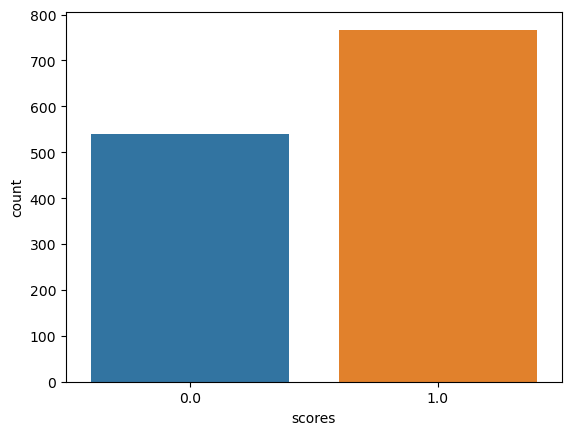

In [ ]:
cat_X = new_titanic_data_2.drop("Age", axis=1)
cat_X.drop("SibSp", axis=1, inplace=True)
cat_X.drop("Parch", axis=1, inplace=True)
cat_X.drop("Fare", axis=1, inplace=True)
cat_X.drop("Survived", axis=1, inplace=True)
gaus_X = pd.concat([new_titanic_data_2["Age"], new_titanic_data_2["Parch"], new_titanic_data_2["Fare"], new_titanic_data_2["SibSp"]], axis=1, ignore_index=True)
y = new_titanic_data_2["Survived"]
cat_X_train, cat_X_test, gaus_X_train, gaus_X_test, y_train, y_test = train_test_split(cat_X, gaus_X, y, test_size=0.3, random_state=75)
cat_scores = []
np.random.seed(42)
loo = LeaveOneOut()
for i, (train_idx, test_idx) in enumerate(loo.split(cat_X, y=y)):
    X_train, X_test = cat_X.iloc[train_idx], cat_X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    clf = CategoricalNB()
    clf.fit(X_train, y_train)
    cat_scores.append(clf.score(X_test, y_test))
gaus_scores = []
for i, (train_idx, test_idx) in enumerate(loo.split(gaus_X, y=y)):
    X_train, X_test = gaus_X.iloc[train_idx], gaus_X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    gaus_scores.append(clf.score(X_test, y_test))
scores = []
for i in range(len(cat_scores)):
    scores.append(cat_scores[i] * gaus_scores[i])
scores = pd.DataFrame(scores)
scores.rename(columns={"0": "scores"}, inplace=True)
scores.columns = ["scores"]
score_0 = len(scores[scores["scores"] == 0.0])
score_1 = len(scores[scores["scores"] == 1.0])
print("Probability of not predicting accurately: ", (score_0/(score_1 + score_0))*100)
print("Probability of predicting accurately: ", (score_1/(score_1 + score_0))*100)
sns.countplot(x="scores", data=scores);